In [3]:
# Import Libs
import numpy as np
import matplotlib.pyplot as plt

# Support LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

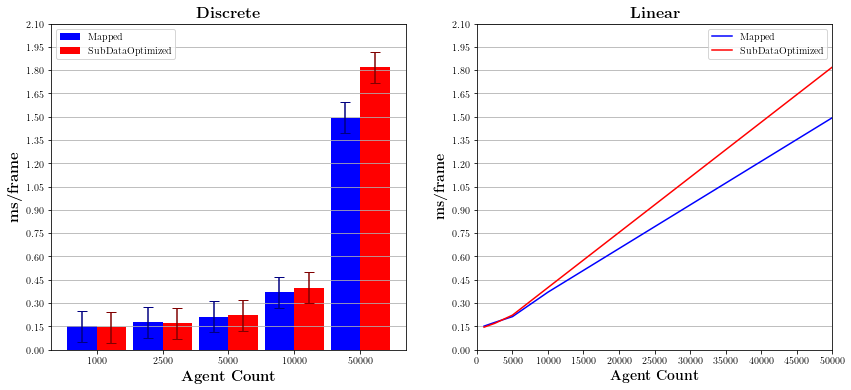

In [14]:
# Mapping vs BufferSubData
agent_counts = (1000, 2500, 5000, 10000, 50000)
mapped_fps = (6600, 5700, 4700, 2700, 670)
subdata_optimized_fps = (6900, 5900, 4500, 2500, 550)
xticks = np.arange(len(agent_counts))

# Change from FPS to frame time
mapped_fps = list(map(lambda x: 1 / x * 1000, mapped_fps))
subdata_optimized_fps = list(map(lambda x: 1 / x * 1000, subdata_optimized_fps))

# Plot
fig, axes = plt.subplots(1, 2, figsize = (14,6))
ax, ax2 = axes
bar_width = 0.45

ax.bar(xticks - bar_width /2, mapped_fps, bar_width, yerr=0.1, color="b", ecolor="navy", capsize=5)
ax.bar(xticks + bar_width / 2, subdata_optimized_fps, bar_width, yerr=0.1, color="r", ecolor="maroon", capsize=5)

# Set up line chart
ax2.plot(agent_counts, mapped_fps, color="b")
ax2.plot(agent_counts, subdata_optimized_fps, color="r")
ax2.set_xlabel(R"\textbf{Agent Count}", fontsize=14)
ax2.set_ylabel(R"\textbf{ms/frame}", fontsize=14)
ax2.set_xlim((1000, 50000))
ax2.set_xticks(np.arange(0, 50001, 5000))
ax2.legend(("Mapped", "SubDataOptimized"))
ax2.set_ylim(0, 2)
ax2.set_yticks(np.arange(0, 2.1, 0.15))
ax2.set_title(R"\textbf{Linear}", fontsize=16)
ax2.grid(True, "major", "y")

# Set up first chart
ax.grid(True, "major", "y")
ax.set_xticks(xticks)
ax.set_xticklabels(agent_counts)
ax.set_title(R"\textbf{Discrete}", fontsize=16)
ax.set_xlabel(R"\textbf{Agent Count}", fontsize=15)
ax.set_ylabel(R"\textbf{ms/frame}", fontsize=15)
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2.1, 0.15))
ax.legend(("Mapped", "SubDataOptimized"))

plt.show()
fig.savefig("fig_gpu_transfer_benchmark.pdf", bbox_inches='tight')